### 1 . Thực hiện với data after_preprocess_no_categorical.csv

In [1]:
import pandas as pd

df_no = pd.read_csv("../data/after_preprocess_no_categorical.csv")

df_no.head()

,BMI,Weight (kg),Calories,Height (m),Burns Calories (per 30 min),Water_Intake (liters),Fat_Percentage
0,0.006613,-0.407569,-0.403132,-0.811571,-0.337377,-1.864510,26.800377
1,-0.209544,-0.826418,-0.826400,-1.362623,0.576165,-1.203034,27.655021
2,-0.571877,-0.704924,-0.769101,-0.417962,0.730928,-1.236108,24.320821
3,1.185363,0.940218,1.169797,-0.181796,0.230924,-0.210821,32.813572
4,-1.554688,-1.015042,-1.024171,1.235196,-1.165704,0.467191,17.307319


#### Tách dữ liệu thành 2 phần train và test để thực hiện việc chọn bậc cho mô hình Polynomial Regression
Chọn random_state = 15 vì ngày thực hiện là ngày 15\
Tách theo tỉ lệ 8:2 

In [2]:
from sklearn.model_selection import train_test_split

X = df_no.drop("Fat_Percentage", axis=1)
y = df_no['Fat_Percentage']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
) 

#### Vòng lặp để thực hiện việc tính toán điểm R-squared và MSE

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from tqdm import tqdm

r_train = []
mse_train = []

r_test = []
mse_test = []

order = [i+1 for i in range(5)]
for i in tqdm(order):
    model = Pipeline(steps=[
            ("poly", PolynomialFeatures(degree=i, include_bias=False)),
            ("reg", LinearRegression())
        ])
    
    model.fit(x_train, y_train)
    r_train.append(model.score(x_train, y_train))
    r_test.append(model.score(x_test, y_test))

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))

100%|██████████| 5/5 [00:00<00:00,  6.10it/s]


#### Vẽ biểu đồ đường điểm R-squared và MSE trên tập train và test để chọn bậc

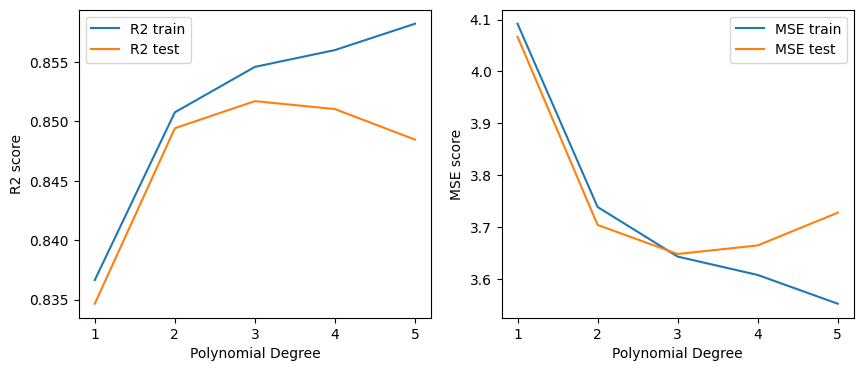

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(order, r_train, label='R2 train')
ax[0].plot(order, r_test, label='R2 test')
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('R2 score')

ax[1].plot(order, mse_train, label='MSE train')
ax[1].plot(order, mse_test, label='MSE test')
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('MSE score')

ax[0].legend()
ax[1].legend()

Nhìn vào hình trên có thể thấy rằng bậc tốt nhất cho bài toán này là bậc 3

In [5]:
model = Pipeline(steps=[
        ("poly", PolynomialFeatures(degree=3, include_bias=False)),
        ("reg", LinearRegression())
    ])

#### Thực hiện cross-validation với k-fold = 5

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=15)

r2_scores = []
mse_scores = []

for train_idx, val_idx in kf.split(X):
    X_train = X.iloc[train_idx]
    X_val   = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val   = y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    r2_scores.append(model.score(X_val, y_val))
    mse_scores.append(mean_squared_error(y_val, y_pred))


print("R2 score từng fold:", r2_scores)
print("MSE score từng fold:", mse_scores)

R2 score từng fold: [0.8516942031261445, 0.8581282333722611, 0.8518239273167033, 0.8523523152419299, 0.8509564597958909]
MSE score từng fold: [3.647975563027356, 3.601438046789206, 3.6697143367719582, 3.7048049878524005, 3.716532778355917]


In [7]:
r2_scores = pd.Series(r2_scores)
print("Độ lệch chuẩn của R2 : ", r2_scores.std())
print("Trung bình của R2 : ", r2_scores.mean())

mse_scores = pd.Series(mse_scores)
print("Độ lệch chuẩn của MSE : ", mse_scores.std())
print("Trung bình của MSE : ", mse_scores.mean())

Độ lệch chuẩn của R2 :  0.002914711802206313
Trung bình của R2 :  0.8529910277705859
Độ lệch chuẩn của MSE :  0.04621797531792439
Trung bình của MSE :  3.6680931425593677


### 2 . Thực hiện với data after_preprocess_with_categorical.csv

In [8]:
df_with = pd.read_csv("../data/after_preprocess_with_categorical.csv")

df_with.head()

,BMI,Weight (kg),Calories,Height (m),Burns Calories (per 30 min),Water_Intake (liters),Gender,Difficulty Level,Burns_Calories_Bin,shoulders,...,pull-up bar,barbell,low bar,trx,bench,sturdy surface,kettlebell,platform,dumbbell,Fat_Percentage
0,0.006613,-0.407569,-0.403132,-0.811571,-0.337377,-1.864510,1,2.0,1.0,1,...,0,0,0,0,0,0,0,0,0,26.800377
1,-0.209544,-0.826418,-0.826400,-1.362623,0.576165,-1.203034,0,1.0,2.0,1,...,0,0,0,0,0,0,0,0,0,27.655021
2,-0.571877,-0.704924,-0.769101,-0.417962,0.730928,-1.236108,0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,24.320821
3,1.185363,0.940218,1.169797,-0.181796,0.230924,-0.210821,0,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,32.813572
4,-1.554688,-1.015042,-1.024171,1.235196,-1.165704,0.467191,1,2.0,0.0,0,...,0,0,0,0,0,0,0,0,0,17.307319


#### Tách dữ liệu thành 2 phần train và test để thực hiện việc chọn bậc cho mô hình Polynomial Regression
Chọn random_state = 15 vì ngày thực hiện là ngày 15\
Tách theo tỉ lệ 8:2 

In [9]:
X = df_with.drop("Fat_Percentage", axis=1)
y = df_with['Fat_Percentage']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
) 

#### Vòng lặp để thực hiện việc tính toán điểm R-squared và MSE

In [10]:
from sklearn.compose import ColumnTransformer

num_cols = list(df_no.drop("Fat_Percentage", axis=1).columns)
cate_cols = [cols for cols in df_with.drop("Fat_Percentage", axis=1).columns if cols not in num_cols]

r_train = []
mse_train = []

r_test = []
mse_test = []

order = [i+1 for i in range(5)]
for i in tqdm(order):
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", PolynomialFeatures(degree=i, include_bias=False), num_cols),
            ("cat", "passthrough", cate_cols)
        ]
    )
    model = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("reg", LinearRegression())
        ])
    
    model.fit(x_train, y_train)
    r_train.append(model.score(x_train, y_train))
    r_test.append(model.score(x_test, y_test))

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    mse_train.append(mean_squared_error(y_pred_train, y_train))
    mse_test.append(mean_squared_error(y_pred_test, y_test))

100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


#### Vẽ biểu đồ đường điểm R-squared và MSE trên tập train và test để chọn bậc

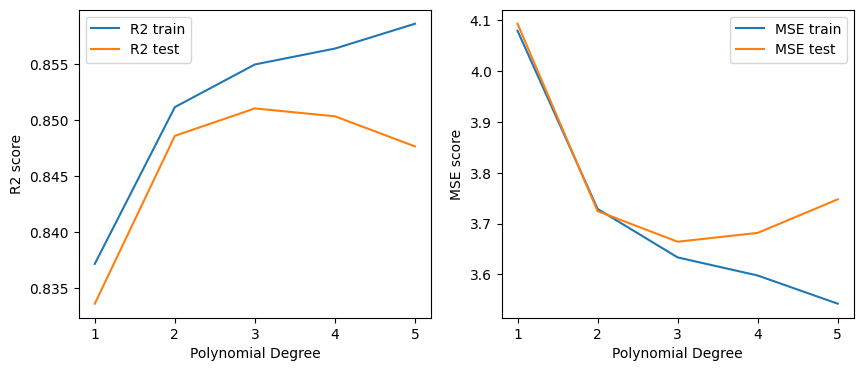

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(order, r_train, label='R2 train')
ax[0].plot(order, r_test, label='R2 test')
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('R2 score')

ax[1].plot(order, mse_train, label='MSE train')
ax[1].plot(order, mse_test, label='MSE test')
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('MSE score')

ax[0].legend()
ax[1].legend()

Nhìn vào hình trên có thể thấy rằng bậc tốt nhất cho bài toán này là bậc 3

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", PolynomialFeatures(degree=3, include_bias=False), num_cols),
        ("cat", "passthrough", cate_cols)
    ]
)
model_ = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("reg", LinearRegression())
])

#### Thực hiện cross-validation với k-fold = 5 (dùng chung KFold với code của phần 1)

In [13]:
r2_scores_ = []
mse_scores_ = []

for train_idx, val_idx in kf.split(X):
    X_train = X.iloc[train_idx]
    X_val_   = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val_   = y.iloc[val_idx]

    model_.fit(X_train, y_train)
    y_pred_ = model_.predict(X_val_)

    r2_scores_.append(model_.score(X_val_, y_val_))
    mse_scores_.append(mean_squared_error(y_val_, y_pred_))


print("R2 score từng fold:", r2_scores_)
print("MSE score từng fold:", mse_scores_)

R2 score từng fold: [0.8510307340371263, 0.8579082722887912, 0.851462207823183, 0.8521509925194931, 0.850489263179822]
MSE score từng fold: [3.664295350079384, 3.6070217949418613, 3.6786726468906146, 3.709856617530673, 3.728182740073001]


In [14]:
r2_scores_ = pd.Series(r2_scores_)
print("Độ lệch chuẩn của R2 : ", r2_scores_.std())
print("Trung bình của R2 : ", r2_scores_.mean())

mse_scores_ = pd.Series(mse_scores_)
print("Độ lệch chuẩn của MSE : ", mse_scores_.std())
print("Trung bình của MSE : ", mse_scores_.mean())

Độ lệch chuẩn của R2 :  0.0030245410843526797
Trung bình của R2 :  0.8526082939696831
Độ lệch chuẩn của MSE :  0.04679356287985783
Trung bình của MSE :  3.677605829903107


### 3 . Vẽ biểu đồ cột để so sánh có và không có biến dạng phân loại

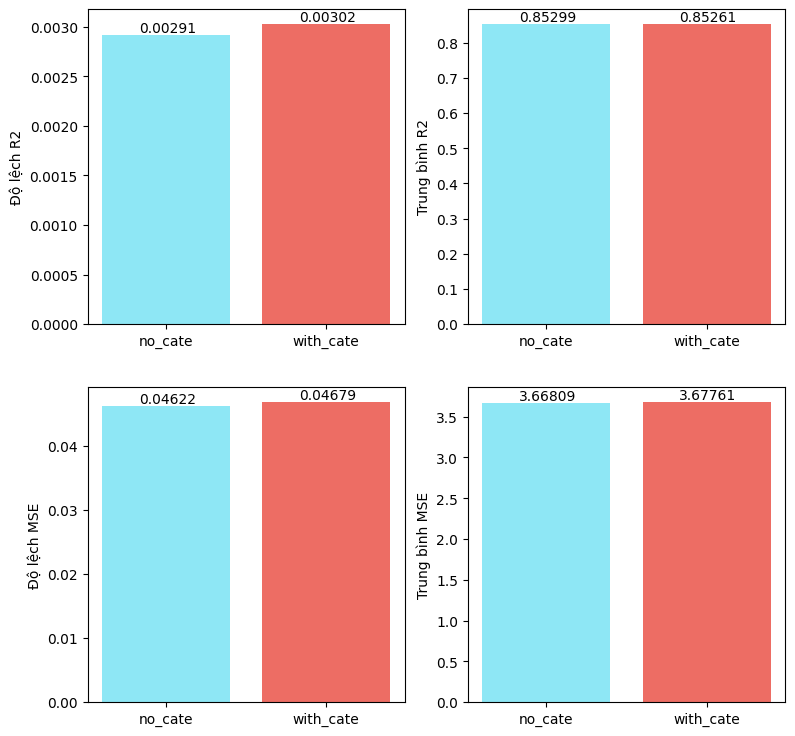

In [15]:
def label(ax, bar, text):
    ax.text(
        bar.get_x() + 0.23,
        bar.get_height() * (1 + 0.01),
        f"{text:.5f}"
    )

width = ["no_cate", "with_cate"]
color = ['#8ee7f5' , '#ed6d64']

fig, ax = plt.subplots(2, 2, figsize=(9, 9))

bars = ax[0, 0].bar(width, [r2_scores.std(), r2_scores_.std()], color=color)
ax[0, 0].set_ylabel('Độ lệch R2')
label(ax[0, 0], bars[0], r2_scores.std())
label(ax[0, 0], bars[1], r2_scores_.std())

bars = ax[0, 1].bar(width, [r2_scores.mean(), r2_scores_.mean()], color=color)
ax[0, 1].set_ylabel('Trung bình R2')
label(ax[0, 1], bars[0], r2_scores.mean())
label(ax[0, 1], bars[1], r2_scores_.mean())

bars = ax[1, 0].bar(width, [mse_scores.std(), mse_scores_.std()], color=color)
ax[1, 0].set_ylabel('Độ lệch MSE')
label(ax[1, 0], bars[0], mse_scores.std())
label(ax[1, 0], bars[1], mse_scores_.std())

bars = ax[1, 1].bar(width, [mse_scores.mean(), mse_scores_.mean()], color=color)
ax[1, 1].set_ylabel('Trung bình MSE')
label(ax[1, 1], bars[0], mse_scores.mean())
label(ax[1, 1], bars[1], mse_scores_.mean())

#### Vẽ biểu đồ trực quan hóa dự đoán trên Fold cuối cùng

Text(0, 0.5, 'Giá trị dự đoán')

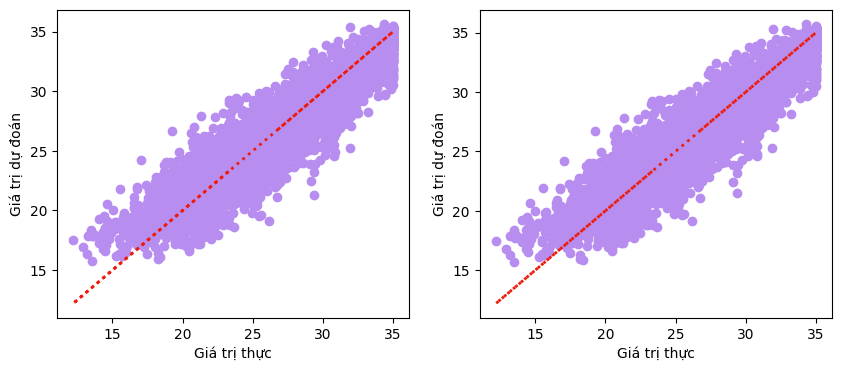

In [16]:
color_1 = '#b88df0'
color_2 = "#ee1c0d"

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].scatter(y_val, y_pred, color=color_1)
ax[0].plot(y_val, y_val, color=color_2, linewidth=2, linestyle=':')
ax[0].set_xlabel('Giá trị thực')
ax[0].set_ylabel('Giá trị dự đoán')

ax[1].scatter(y_val_, y_pred_, color=color_1)
ax[1].plot(y_val_, y_val_, color=color_2, linewidth=2, linestyle=':')
ax[1].set_xlabel('Giá trị thực')
ax[1].set_ylabel('Giá trị dự đoán')

### Nhận xét : 

    - Đúng như khi EDA thì khi thêm các biến categorical không hề khiến mô hình dự đoán tốt hơn. Khi thực hiện cross-validation với k-fold = 5 thì kết quả của no_cate và with_cate không chênh lệch quá nhiều (không có biến dạng categorical sẽ tốt hơn một tí, không đáng kể).
    - Nhận xét về độ lệch chuẩn R2 trong 5 fold 